# Soft Computing

## Tugas 1: Multilayer Perceptron

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas1_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- tensorflow/keras
- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/50**

### Deskripsi Dataset

Hampir setiap orang yang belajar tentang neural networks atau deep learning selalu memulai dari dataset [MNIST](http://yann.lecun.com/exdb/mnist/). Dataset ini terdiri dari gambar angka dari 0-9 dengan pembagian: 60,000 data latih dan 10,000 data uji. Setiap gambar telah diproses agar memiliki dimensi yang sama dan diletakkan di pertengahan. Deskripsi lebih lanjut tentang dataset ini dapat Anda lihat di [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database).

Untuk memudahkan pengerjaan tugas ini, dataset hanya dibagi menjadi dua: **training set** dan **test set**.

### Mengimpor Modul dan Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 1. Eksplorasi Awal Data (10 poin)

Pada bagian ini, kecuali dijelaskan lebih rinci, dataset yang Anda harusnya gunakan adalah `x_train`.

### Soal 1.1 (2 poin)

Tunjukkan dimensi dari data latih dan data uji.

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Soal 1.2 (4 poin)

Ambil 1 contoh gambar dari masing-masing kelas, lalu gambarkan.

*Petunjuk: Anda dapat menggunakan `plt.imshow()`*

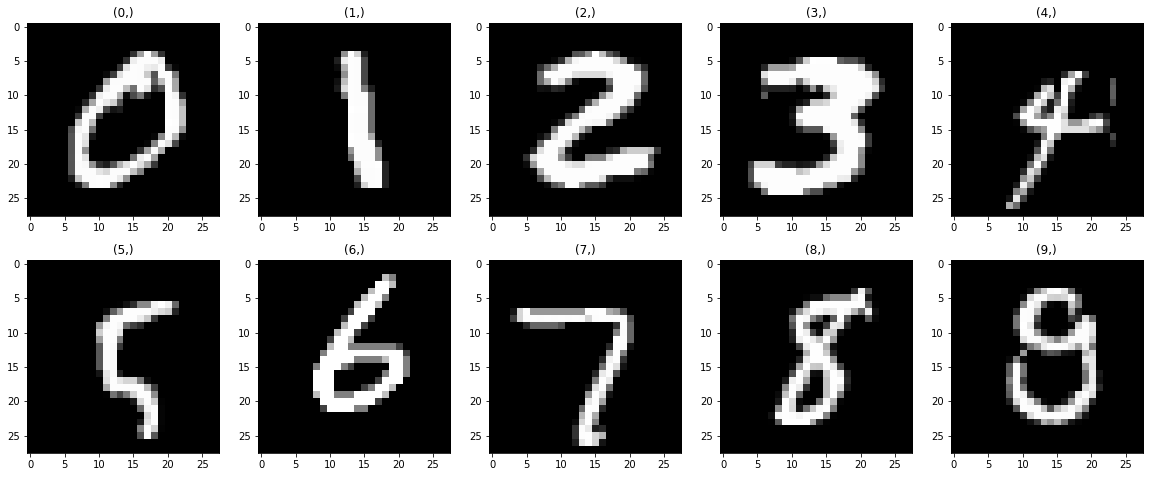

In [5]:
f, axes = plt.subplots(2, 5, figsize=(20,8))
axes = axes.reshape(-1)
for i in zip (range(10)):
    a = axes[i]
    a.imshow(x_train[y_train == i][i].reshape(28, 28), cmap='gist_gray')
    a.set_title(i)
plt.show()

sumber : 
*   https://github.com/random-forests/tutorials/blob/master/ep7.ipynb
*   https://www.youtube.com/watch?v=Gj0iyo265bc&t=130s


### Soal 1.3 (2 poin)

Ambil nilai rata-rata tiap pixel dari setiap kelas, lalu gambarkan.

*Petunjuk: Anda akan menghasilkan 10 gambar, yaitu rata-rata gambar 0, 1, 2, dst. Jika Anda menggunakan cara yang benar, seharusnya Anda hanya perlu mengganti dua baris dari kode yang Anda kerjakan pada soal 1.2.*

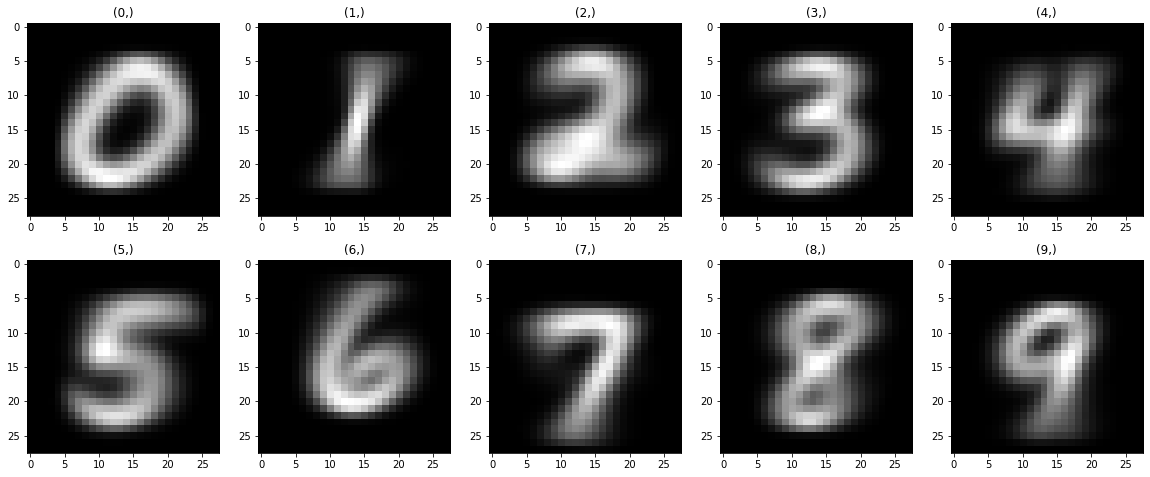

In [6]:
f, axes = plt.subplots(2, 5, figsize=(20,8))
axes = axes.reshape(-1)
for i in zip (range(10)):
    a = axes[i]
    a.imshow(x_train[y_train == i].mean(axis=0).reshape(28, 28), cmap='gist_gray')
    a.set_title(i)
plt.show()

### Soal 1.4 (2 poin)

Gambarkan grafik berupa garis yang sumbu horizontalnya adalah indeks pixel (0-783) dan sumbu vertikalnya adalah nilai rata-rata dari pixel tersebut. Apa yang dapat Anda perhatikan?

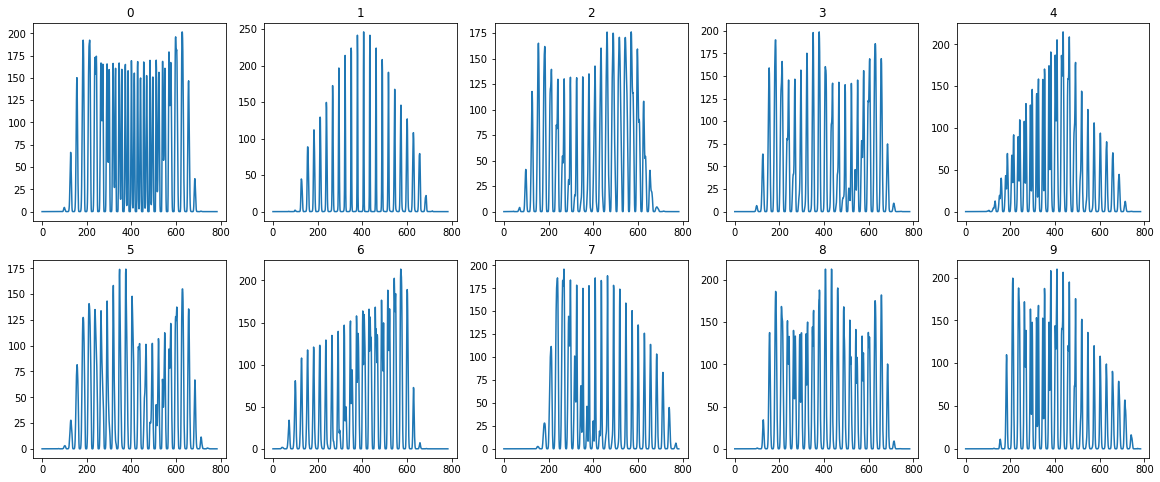

In [7]:
f, axes = plt.subplots(2, 5, figsize=(20,8))
for i, ax in zip (range(10), axes.flatten()):
    img = x_train[y_train == i].mean(axis=0).reshape((784))
    ax.set_title(i)
    ax.plot(img)
plt.show()

Jawab:

Setiap kelas memiliki rata rata setiap pixel yang berbeda. 

## 2. Preprocessing (5 poin)

### Soal 2.1 (2 poin)

Karena nilai pixel sudah ada di rentang [0,255], transformasikan setiap gambar dengan membagi nilainya dengan 255 agar menjadi [0,1].

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train/255
x_test = x_test/255

### Soal 2.2 (2 poin)

Saat ini, kelas dalam `y_train` masih berupa nilai [0,9]. Ubah nilainya menjadi one-hot-encoder. Anda dapat menggunakan fungsi `tf.keras.utils.to_categorical`.

In [9]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### Soal 2.3 (1 poin)

Tuliskan rumus fungsi softmax yang nanti akan digunakan dalam kasus klasifikasi MNIST.

$$
\hat{y}_k = \frac{e^a_k}{\sum_{c=1}^K e^a_c}
$$

### 3. Klasifikasi dengan Regresi Logistik (15 poin)

### Soal 3.1 (2 poin)

Buatlah model **regresi logistik** dengan fungsi softmax sebagai keluarannya dengan hanya menggunakan TensorFlow/Keras. Anda tidak diperkenankan menggunakan pustaka scikit-learn untuk menghasilkan model regresi logistik.

*Petunjuk: Apa representasi regresi logistik jika dilihat dari sudut pandang neural networks?*

In [10]:
def logreg():
    # Kode Anda di sini
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

source:
https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html

### Soal 3.2 (3 poin)

Latih model yang telah Anda buat dengan *training set*. Gunakan Adam sebagai optimizer dari model Anda, `categorical_crossentropy` sebagai *loss function*, 10 epochs, dan akurasi sebagai *metric*. Berapa persen akurasi pada data latih dari model yang dihasilkan?

In [11]:
model = logreg()
epochs = 10

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.01), # Stochastic Gradient Descent dengan lr (learning rate) = η
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4415 - accuracy: 0.8734
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3291 - accuracy: 0.9120
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3239 - accuracy: 0.9119
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3195 - accuracy: 0.9166
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3243 - accuracy: 0.9146
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.9179
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3117 - accuracy: 0.9162
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3087 - accuracy: 0.9190
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3095 - accuracy: 0.9186
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.309

Jawab:

Akurasi terbaik model tsb adalah 92.19%

### Soal 3.3 (3 poin)

Evaluasi model Anda pada *test set*. Berapa akurasi yang didapatkan? Gambarkan pula *confusion matrix* dari prediksi yang Anda hasilkan terhadap nilai yang sebenarnya.

In [12]:
y_test_ = np.argmax(y_test, axis=1)
y_test_

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(x_test)
pred_ = np.argmax(pred, axis=1)

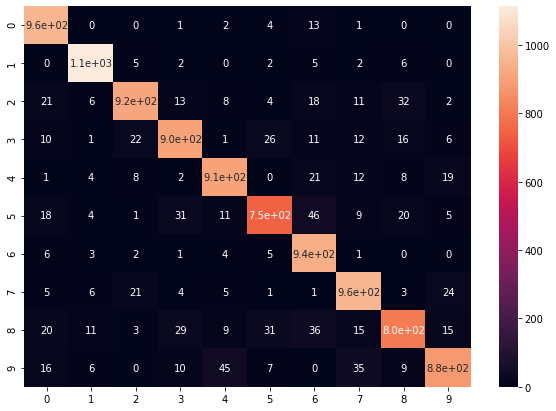

In [14]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10,7))
cm = confusion_matrix(y_test_, pred_)
sns.heatmap(cm, annot=True)

In [15]:
accuracy_score(y_test_, pred_)

0.9128

### Soal 3.4 (2 poin)

Ambil satu gambar angka 8 dari data uji. Lalu prediksi menggunakan model yang telah Anda buat. Tampilkan probabilitas dari masing-masing kelas dari hasil prediksi model Anda.

In [16]:
np.random.seed(42)

sample = x_test[y_test_ == 8]
pred_sample = model.predict_proba(sample)

for i in range(len(pred_sample[100])):
  print('kelas {}: {:.4f}'.format(i, pred_sample[100][i]))

kelas 0: 0.0006
kelas 1: 0.0007
kelas 2: 0.0008
kelas 3: 0.0003
kelas 4: 0.0000
kelas 5: 0.0165
kelas 6: 0.0000
kelas 7: 0.0000
kelas 8: 0.9809
kelas 9: 0.0001


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


### Soal 3.5 (2 poin)

Latih kembali model regresi logistik Anda dengan konfigurasi seperti pada soal 3.2. Namun, ubah nilai `epochs` menjadi 50. Lalu, gambarkan *learning curve*-nya dengan menambahkan data uji sebagai parameter `validation_data` dari `model.fit()`.

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8719 - val_loss: 0.3322 - val_accuracy: 0.9110
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3293 - accuracy: 0.9118 - val_loss: 0.3199 - val_accuracy: 0.9167
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3245 - accuracy: 0.9135 - val_loss: 0.3833 - val_accuracy: 0.8944
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3132 - accuracy: 0.9161 - val_loss: 0.3703 - val_accuracy: 0.9081
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3115 - accuracy: 0.9151 - val_loss: 0.3715 - val_accuracy: 0.9069
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3143 - accuracy: 0.9165 - val_loss: 0.3867 - val_accuracy: 0.9013
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3197 - accuracy: 0.9169 - val_loss: 0.3746 - val_accuracy:

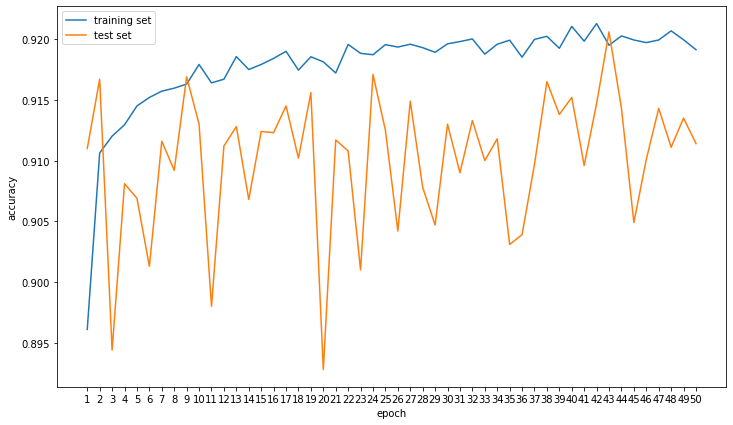

In [17]:
np.random.seed(42)

model = logreg()
# Kode Anda di sini


model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

history = model.fit(x_train, y_train,
          epochs=50,
          validation_data=(x_test, y_test)
                   )

fig, ax = plt.subplots(figsize=(12,7))
plt.plot(range(1,51), history.history['accuracy'], label='training set')
plt.plot(range(1,51), history.history['val_accuracy'], label='test set')
plt.xticks(range(1,51), range(1,51))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

### Soal 3.6 (3 poin)

Berikan kesimpulan Anda dari hasil yang Anda dapatkan sejauh ini.

Jawab:

Logistic regression dapat direpresentasikan sebagai satu layer dalam sebuah neural network. Untuk kasus mnist hanya dengan satu layer yang di representasikan sebagai logistic regression dapat cukup baik dalam melakukan klasifikasi. Walau dengan model tersebut model tidak melakukan generalisasi dengan baik.

## 4. Multilayer Perceptron: Wide vs Deep (20 poin)

Mana yang lebih baik: model yang melebar atau mendalam?

### Soal 4.1 (2 poin)

Buatlah model *neural network* dengan satu *hidden layer* yang terdiri dari 800 *hidden units*. Gunakan fungsi aktivasi ReLU pada *hidden layer* dan softmax pada *output layer*.

In [19]:
def wide_net():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(800, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=5)
  model.evaluate(x_test, y_test)
  return model

model = wide_net()
model.summary()

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4695 - accuracy: 0.8627
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1483 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0999 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0758 - accuracy: 0.9768
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9676
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_3 (Dense)              (None, 800)               16800     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                8010      
Total params:

### Soal 4.2.a (6 poin)

Jika kita ingin membandingkan model *neural networks*, ada baiknya jika jumlah parameter yang digunakan sama banyaknya. Oleh karena itu, sebagai perbandingan dari arsitektur yang telah Anda buat pada soal 4.1, buatlah tiga model *neural networks* yang bersifat mendalam dengan 2, 3, dan 4 *hidden layers*. Untuk mempermudah, gunakan jumlah *hidden units* yang sama di tiap *hidden layer*.

In [20]:
def deep_net_2():
    # Kode Anda di sini
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(40, activation=tf.nn.relu),
        tf.keras.layers.Dense(60, activation=tf.nn.relu),
        tf.keras.layers.Dense(40, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5)
    model.evaluate(x_test, y_test)
    return model

model = deep_net_2()
model.summary()

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6532 - accuracy: 0.7963
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1887 - accuracy: 0.9442
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1456 - accuracy: 0.9554
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1251 - accuracy: 0.9626
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.1395 - accuracy: 0.9592
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_6 (Dense)              (None, 40)                840       
_____________

In [21]:
def deep_net_3():
    # Kode Anda di sini
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.relu),
        tf.keras.layers.Dense(20, activation=tf.nn.relu),
        tf.keras.layers.Dense(30, activation=tf.nn.relu),
        tf.keras.layers.Dense(30, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5)
    model.evaluate(x_test, y_test)
    return model

model = deep_net_3()
model.summary()

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8274 - accuracy: 0.2971
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9160 - accuracy: 0.7105
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6582 - accuracy: 0.8086
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5325 - accuracy: 0.8500
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.4702 - accuracy: 0.8924
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                220       
_____________

In [22]:
def deep_net_4():
    # Kode Anda di sini
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation=tf.nn.relu),
        tf.keras.layers.Dense(2, activation=tf.nn.relu),
        tf.keras.layers.Dense(9, activation=tf.nn.relu),
        tf.keras.layers.Dense(8, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.relu),
        tf.keras.layers.Dense(3, activation=tf.nn.relu),
        tf.keras.layers.Dense(3, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.relu),
        tf.keras.layers.Dense(5, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5)
    model.evaluate(x_test, y_test)
    return model
  
model = deep_net_4()
model.summary()

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9750 - accuracy: 0.1900
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5890 - accuracy: 0.3602
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2665 - accuracy: 0.5073
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1470 - accuracy: 0.5638
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 1.0398 - accuracy: 0.6680
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_24 (Dense)             (None, 9)                 27        
_____________

### Soal 4.2.b (4 poin)

Tuliskan perhitungan yang Anda gunakan untuk menghasilkan jumlah *hidden units* pada masing-masing *hidden layers* untuk soal 4.2.a. Perhatikan bahwa jumlah parameternya tidak harus persis sama, tetapi bisa mendekati.

*Petunjuk: Anda mungkin akan memerlukan rumus:*
\begin{align}
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
\end{align}

*Jawaban Anda di sini*

### Soal 4.3 (4 poin)

Latihlah setiap arsitektur yang telah Anda definisikan di atas. Gambarkan pula *learning curves* yang dihasilkan pada satu gambar.

In [ ]:
np.random.seed(42)

# Kode Anda di sini

### Soal 4.4 (4 poin)

Berikan kesimpulan Anda dari eksplorasi yang telah Anda lakukan pada tugas ini.

Untuk lapisan yang disusun mendalam semakin buruk hasilnya. Nilai parameter dipengaruhi oleh jumlah lapisannya, semakin tipis lapisannya semakin banyak parameter yang digunakan.